In [1]:
import numpy as np
import pandas as pd
import sklearn
import xgboost as xgb
import matplotlib.pyplot as plt
import seaborn as sns

import os
sns.set()
%matplotlib inline

C:\Users\alway\anaconda3\envs\ml_ds_nn_evn\lib\site-packages\xgboost\compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


In [2]:
df = pd.read_csv('../Данные/out_w_date_an_orig.csv', parse_dates=True)
df['add_time'] = pd.to_datetime(df['add_time'], format='%Y-%m-%d')

In [3]:
df.dtypes

abiturient_id             int64
status                    int64
add_time         datetime64[ns]
id                        int64
name                     object
true                      int64
ex                       object
point                    object
eduform_id                int64
fintype_id                int64
dtype: object

In [4]:
df['point_mean'] = df['point'].apply(lambda x: sum(map(int, x.split(',')))/len(x.split(',')))
df['point_sum'] = df['point'].apply(lambda x: sum(map(int, x.split(','))))
df = df[df['point_mean'] > 0].reset_index(drop=True)

In [5]:
df.head()

,abiturient_id,status,add_time,id,name,true,ex,point,eduform_id,fintype_id,point_mean,point_sum
0,202100008,1,2021-04-09,11,Машиностроение,1,"Математика,Физика,Русский язык","74,55,72",2,2,67.000000,201
1,202100009,1,2021-04-22,3,Программная инженерия,1,"Математика,Информатика и ИКТ,Русский язык","98,88,59",2,2,81.666667,245
2,202100622,1,2021-06-24,33,Проектирование авиационных и ракетных двигателей,0,"Математика,Физика,Русский язык","72,51,76",1,1,66.333333,199
3,202100622,1,2021-06-24,18,Ракетные комплексы и космонавтика,0,"Математика,Физика,Русский язык","72,51,76",1,1,66.333333,199
4,202100622,1,2021-06-24,32,"Проектирование, производство и эксплуатация ра...",0,"Математика,Физика,Русский язык","72,51,76",1,1,66.333333,199


In [6]:
pd.value_counts(df['true'], normalize=True)

0    0.812105
1    0.187895
Name: true, dtype: float64

In [7]:
gdf_mean = df.groupby(['name']).agg({'point_mean': ['mean'],
                                    }).transpose()

In [8]:
df['spec_mean_point'] = [gdf_mean[df.loc[i, ['name']][0]][0] for i in range(df.shape[0])]

In [9]:
df['bal_above_id'] = 0

In [10]:
for i in range(df.shape[0]):
    row = df.iloc[i]
    df.loc[i, ['bal_above_id']] = df[(df['name'] == row['name']) & (df['point_sum'] >= row['point_sum'])].shape[0]

In [11]:
y = df['true']
X = df.drop(['abiturient_id', 'add_time', 'point', 'id', 'true', 'status'], axis=1)

In [12]:
X.head()

,name,ex,eduform_id,fintype_id,point_mean,point_sum,spec_mean_point,bal_above_id
0,Машиностроение,"Математика,Физика,Русский язык",2,2,67.000000,201,64.991546,123
1,Программная инженерия,"Математика,Информатика и ИКТ,Русский язык",2,2,81.666667,245,72.493968,240
2,Проектирование авиационных и ракетных двигателей,"Математика,Физика,Русский язык",1,1,66.333333,199,66.537707,216
3,Ракетные комплексы и космонавтика,"Математика,Физика,Русский язык",1,1,66.333333,199,68.146868,281
4,"Проектирование, производство и эксплуатация ра...","Математика,Физика,Русский язык",1,1,66.333333,199,68.920354,276


In [13]:
pd.value_counts(y, normalize=True)

0    0.812105
1    0.187895
Name: true, dtype: float64

In [14]:
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_validate
from sklearn.preprocessing import LabelEncoder

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [16]:
X_train.head()

,name,ex,eduform_id,fintype_id,point_mean,point_sum,spec_mean_point,bal_above_id
4789,"Стрелково-пушечное, артиллерийское и ракетное ...","Математика,Физика,Русский язык",1,1,70.666667,212,64.140741,74
6889,Информационные системы и технологии,"Математика,Информатика и ИКТ,Русский язык",1,2,78.666667,236,72.075055,343
4704,Мехатроника и робототехника,"Математика,Физика,Русский язык",1,1,83.000000,249,69.980047,18
8737,Стандартизация и метрология,"Математика,Физика,Русский язык",1,1,64.333333,193,65.050980,55
6884,Оптотехника,"Математика,Физика,Русский язык",1,1,69.333333,208,65.300412,44


In [17]:
X_train.head()

,name,ex,eduform_id,fintype_id,point_mean,point_sum,spec_mean_point,bal_above_id
4789,"Стрелково-пушечное, артиллерийское и ракетное ...","Математика,Физика,Русский язык",1,1,70.666667,212,64.140741,74
6889,Информационные системы и технологии,"Математика,Информатика и ИКТ,Русский язык",1,2,78.666667,236,72.075055,343
4704,Мехатроника и робототехника,"Математика,Физика,Русский язык",1,1,83.000000,249,69.980047,18
8737,Стандартизация и метрология,"Математика,Физика,Русский язык",1,1,64.333333,193,65.050980,55
6884,Оптотехника,"Математика,Физика,Русский язык",1,1,69.333333,208,65.300412,44


In [18]:
enc = LabelEncoder()

In [19]:
for i in ['name', 'ex', 'eduform_id', 'fintype_id']:
    X_train[i] = enc.fit_transform(X_train[i])
    X_test[i] = enc.transform(X_test[i])

In [20]:
X_train

,name,ex,eduform_id,fintype_id,point_mean,point_sum,spec_mean_point,bal_above_id
4789,27,5,0,0,70.666667,212,64.140741,74
6889,5,3,0,1,78.666667,236,72.075055,343
4704,10,5,0,0,83.000000,249,69.980047,18
8737,26,5,0,0,64.333333,193,65.050980,55
6884,12,5,0,0,69.333333,208,65.300412,44
...,...,...,...,...,...,...,...,...
5734,17,5,0,0,69.333333,208,66.537707,168
5191,4,3,0,0,51.333333,154,72.331393,834
5390,16,3,0,1,93.333333,280,72.493968,21
860,27,5,0,1,60.333333,181,64.140741,214


In [21]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay, roc_auc_score, roc_curve, RocCurveDisplay

In [22]:
# clf = RandomForestClassifier(n_estimators=500,
#                              max_depth=25,
#                              oob_score=True,
#                              class_weight='balanced')

In [23]:
# clf = GradientBoostingClassifier(n_estimators=500, max_depth=25, min_samples_split=3)

In [24]:
clf = xgb.XGBClassifier(n_estimators=300, max_depth=15, scale_pos_weight=5, alpha=0.01)

In [25]:
clf.fit(X_train, y_train)

C:\Users\alway\anaconda3\envs\ml_ds_nn_evn\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\alway\anaconda3\envs\ml_ds_nn_evn\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[12:18:04] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(alpha=0.01, base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=15, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=300, n_jobs=4,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0.00999999978, reg_lambda=1, scale_pos_weight=5,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [26]:
# clf.oob_score_

In [27]:
y_pred = clf.predict(X_test)

In [28]:
accuracy_score(y_test, y_pred)

0.7699443413729128

In [29]:
precision_score(y_test, y_pred)

0.422271223814774

In [30]:
recall_score(y_test, y_pred)

0.6351575456053068

C:\Users\alway\anaconda3\envs\ml_ds_nn_evn\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


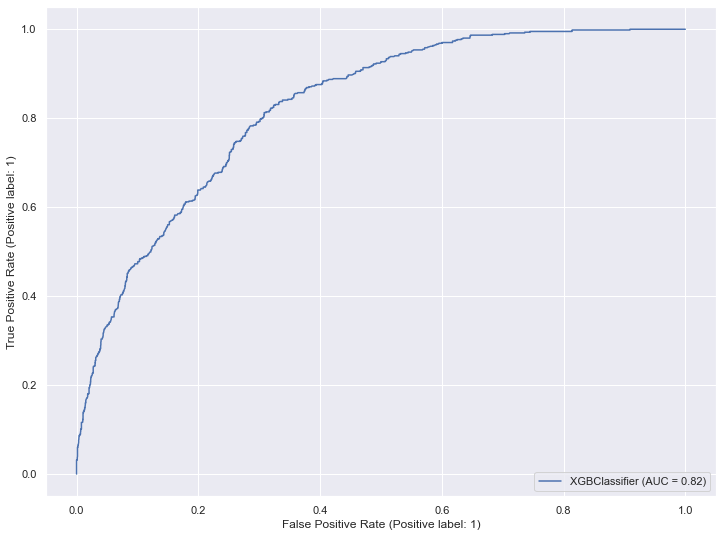

In [31]:
fig, ax = plt.subplots()
fig.set_size_inches((12, 9))
RocCurveDisplay.from_estimator(clf, X_test, y_test, ax=ax)

In [32]:
cnf_mt = confusion_matrix(y_test, y_pred)

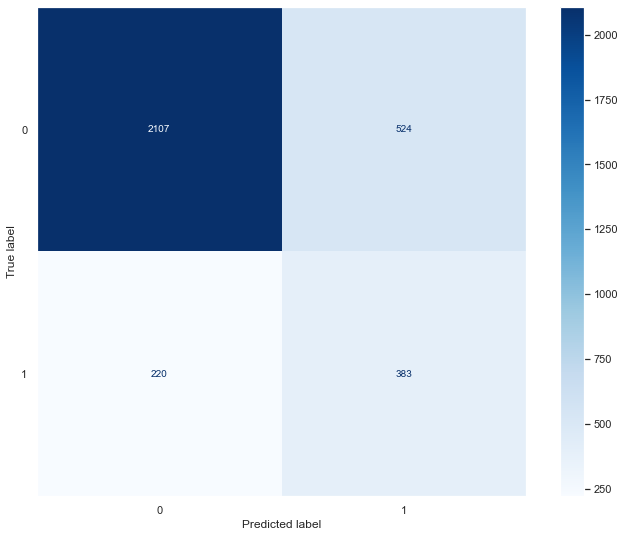

In [33]:
fig, ax = plt.subplots()
fig.set_size_inches((12, 9))
disp = ConfusionMatrixDisplay(cnf_mt)
disp.plot(ax=ax, cmap=plt.cm.Blues)
plt.grid(False)

Настройка параметров модели на кросс-валидации

In [34]:
params = {
    'max_depth': [15, 20, 25],
    'alpha': [0.01, 0.05, 0.1]
}

In [35]:
# gcv = GridSearchCV(
#     estimator=xgb.XGBClassifier(n_estimators=300, scale_pos_weight=5),
#     param_grid=params,
#     cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42),
#     scoring='roc_auc',
#     n_jobs=4
# )

In [36]:
# gcv.fit(X_train, y_train)

In [37]:
# gcv.best_score_

In [38]:
# gcv.best_params_

In [39]:
from catboost import Pool, CatBoostClassifier

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [41]:
X_train.head()

,name,ex,eduform_id,fintype_id,point_mean,point_sum,spec_mean_point,bal_above_id
4789,"Стрелково-пушечное, артиллерийское и ракетное ...","Математика,Физика,Русский язык",1,1,70.666667,212,64.140741,74
6889,Информационные системы и технологии,"Математика,Информатика и ИКТ,Русский язык",1,2,78.666667,236,72.075055,343
4704,Мехатроника и робототехника,"Математика,Физика,Русский язык",1,1,83.000000,249,69.980047,18
8737,Стандартизация и метрология,"Математика,Физика,Русский язык",1,1,64.333333,193,65.050980,55
6884,Оптотехника,"Математика,Физика,Русский язык",1,1,69.333333,208,65.300412,44


In [42]:
 train_pool = Pool(
     data=X_train,
     label=y_train,
     cat_features=['name', 'ex', 'eduform_id', 'fintype_id']
 )
    
test_pool = Pool(
    data=X_test,
    label=y_test,
    cat_features=['name', 'ex', 'eduform_id', 'fintype_id']
)

In [43]:
clf = CatBoostClassifier(
    iterations=300,
    depth=15,
    learning_rate=0.1,
)

In [44]:
clf.fit(train_pool)

0:	learn: 0.6427223	total: 231ms	remaining: 1m 8s
1:	learn: 0.5965400	total: 252ms	remaining: 37.5s
2:	learn: 0.5651491	total: 275ms	remaining: 27.2s
3:	learn: 0.5277901	total: 977ms	remaining: 1m 12s
4:	learn: 0.5095545	total: 1.02s	remaining: 1m
5:	learn: 0.4863707	total: 1.27s	remaining: 1m 2s
6:	learn: 0.4767679	total: 1.28s	remaining: 53.6s
7:	learn: 0.4676297	total: 1.32s	remaining: 48.4s
8:	learn: 0.4493453	total: 2.08s	remaining: 1m 7s
9:	learn: 0.4337256	total: 2.79s	remaining: 1m 20s
10:	learn: 0.4294122	total: 2.81s	remaining: 1m 13s
11:	learn: 0.4155999	total: 3.62s	remaining: 1m 26s
12:	learn: 0.4139662	total: 3.63s	remaining: 1m 20s
13:	learn: 0.4017924	total: 4.39s	remaining: 1m 29s
14:	learn: 0.3922768	total: 5s	remaining: 1m 35s
15:	learn: 0.3906742	total: 5.01s	remaining: 1m 29s
16:	learn: 0.3855975	total: 5.67s	remaining: 1m 34s
17:	learn: 0.3845169	total: 5.72s	remaining: 1m 29s
18:	learn: 0.3805376	total: 6.57s	remaining: 1m 37s
19:	learn: 0.3794741	total: 6.62s	re

158:	learn: 0.2297434	total: 1m 33s	remaining: 1m 22s
159:	learn: 0.2291357	total: 1m 34s	remaining: 1m 22s
160:	learn: 0.2286296	total: 1m 34s	remaining: 1m 21s
161:	learn: 0.2279239	total: 1m 35s	remaining: 1m 21s
162:	learn: 0.2275876	total: 1m 36s	remaining: 1m 20s
163:	learn: 0.2267098	total: 1m 37s	remaining: 1m 20s
164:	learn: 0.2262528	total: 1m 38s	remaining: 1m 20s
165:	learn: 0.2256988	total: 1m 39s	remaining: 1m 20s
166:	learn: 0.2243273	total: 1m 40s	remaining: 1m 19s
167:	learn: 0.2235184	total: 1m 41s	remaining: 1m 19s
168:	learn: 0.2228909	total: 1m 41s	remaining: 1m 19s
169:	learn: 0.2226592	total: 1m 42s	remaining: 1m 18s
170:	learn: 0.2221251	total: 1m 42s	remaining: 1m 17s
171:	learn: 0.2214287	total: 1m 43s	remaining: 1m 17s
172:	learn: 0.2207039	total: 1m 44s	remaining: 1m 16s
173:	learn: 0.2201335	total: 1m 44s	remaining: 1m 15s
174:	learn: 0.2198959	total: 1m 45s	remaining: 1m 15s
175:	learn: 0.2192693	total: 1m 46s	remaining: 1m 15s
176:	learn: 0.2188725	total:

In [51]:
y_pred = clf.predict(test_pool)

In [52]:
accuracy_score(y_test, y_pred)

0.826530612244898

In [53]:
precision_score(y_test, y_pred)

0.5546875

In [54]:
recall_score(y_test, y_pred)

0.35323383084577115

In [55]:
cnf_mt = confusion_matrix(y_test, y_pred)

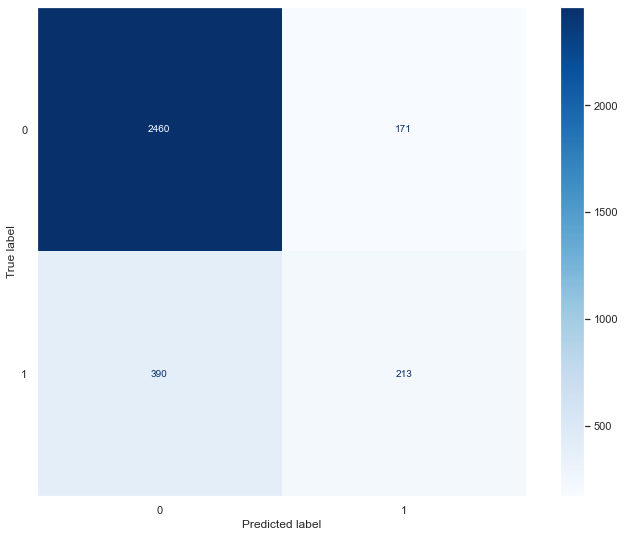

In [56]:
fig, ax = plt.subplots()
fig.set_size_inches((12, 9))
disp = ConfusionMatrixDisplay(cnf_mt)
disp.plot(ax=ax, cmap=plt.cm.Blues)
plt.grid(False)